# Non-Relativistic motion of charged particles in ideal dipole field of planet Earth using Boris C method

### Equations of motions for non relativistic particles (without the lorentz factor)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
c = 299792458.0 # [m/s]  speed of light
Re = 6378137.0 # [m] earth's radius
B_0 = 3.07e-5
m_p = 1.6726219e-27 # [kg]  mass of proton
m_e = 9.10938356e-31 # [kg]  mass of electron
qe = 1.6021766210e-19 # [C]  elemantary charge
sinphi = np.sin(11.7*np.pi/180.0) # 11.7 degrees between magnetic and rotational axis
cosphi = np.cos(11.7*np.pi/180.0)

In [3]:
# defining an ideal dipole field of earth
# given in 10.1016@j.asr.2020.10.020.pdf eqn 4

def BP(R): 
    denom = (R[0]**2.0 + R[1]**2.0 + R[2]**2.0)**2.5
    BPx = -(B_0*Re**3)*((3.0*R[0]*R[2]*cosphi) + (3.0*R[0]*R[1]*sinphi))/denom
    BPy = -(B_0*Re**3)*((3.0*R[1]*R[2]*cosphi) + (2.0*sinphi*(R[1]**2.0)) - (sinphi*(R[0]**2.0)) - (sinphi*(R[2]**2.0)))/denom
    BPz = -(B_0*Re**3)*((2.0*cosphi*(R[2]**2.0)) - (cosphi*(R[0]**2.0)) - (cosphi*(R[1]**2.0)) + (3.0*R[2]*R[1]*sinphi))/denom  
    BP = np.array([BPx, BPy, BPz])
    return BP 

In [4]:
dt = 0.0001 # integration step  
ts = 100.0 # simulation duration
n_step = int(ts/dt) # number of steps

In [5]:
t = np.zeros(n_step) # initializing
rvek = np.zeros((len(t), 3))
vvek = np.zeros((len(t), 3))


In [6]:
# for particle type protons
m = 1.0*m_p  
q = 1.0*qe

In [7]:
rvek[0, :] = np.array([0.0, -7.85, -1.53])*Re
vvek[0, :] = np.array([0.0, 1.8e6, 1.8e6])
E = np.array([0.0, 0.0, 0.0])

In [9]:
kinetic_init = m * 0.5 * np.linalg.norm(vvek[0, :]) ** 2.0
for i in range(1,n_step):
    R = rvek[i-1, :]
    v = vvek[i-1,:]
    R_minus = R + (dt*v)/(2)
    
    
    B = BP(R_minus)
    mod_B = (np.sqrt(B[0]**2.0 + B[1]**2.0 + B[2]**2.0))
    b = B/mod_B
    
    v_minus = v + (q*dt/(2.0*m))*(E)
    theta = (q*dt*mod_B)/(m)
    v_minus_pl = np.dot(v_minus, b)*b
    v_prime = v_minus_pl+ ((v_minus - v_minus_pl)*np.cos(theta)) + (np.cross(v_minus,b)*np.sin(theta))
    v_plus = v_prime + (q*dt/(2.0*m))*(E)
    R_plus = R_minus + (dt*v_plus)/(2)
    
    vvek[i] = v_plus
    rvek[i] = R_plus
    t[i] = dt*i

kinetic_final = m * 0.5 * np.linalg.norm(vvek[-1, :]) ** 2.0
ans = (kinetic_init - kinetic_final)/kinetic_init
print(ans)    
    #print(t[i],vvek[i])

6.332087412795551e-14


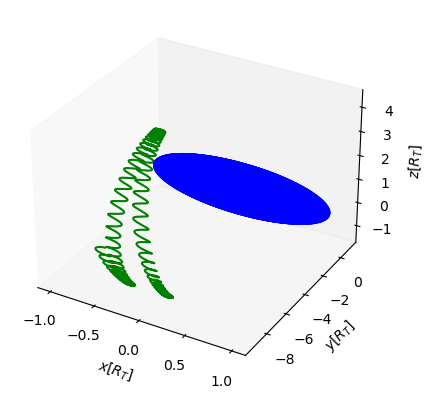

In [9]:
# graphical representation
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('auto')
ax.grid(False)
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j] # Earth as a ball
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color = "blue")
plt.xlabel("$x[R_T]$")
plt.ylabel("$y[R_T]$")
ax.set_zlabel("$z[R_T]$")
plt.axis('on')
plt.plot(rvek[:, 0]/Re, rvek[:, 1]/Re, rvek[:, 2]/Re, color = 'green')
plt.show()